-***Tratamento inicial***

In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea


#link do dataset utilizado: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
#importação de dados do dataset:
breastC = pd.read_csv("data.csv", encoding='utf-8')

-***Inspeção do Dataset***

In [ ]:
#exibir "cabeçalho" do dataset
breastC.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#exibindo dataset
breastC

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


-***Tratamento de dados***

In [ ]:
#contando valores dentro de "diagnosis" dividido por B-Benign & M-malign
breastC.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#B -> benign /// separando dataset por dados de tumores benigns
B = breastC.query("diagnosis == 'B'")
B.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


In [ ]:
#M -> maligns /// separando dataset por dados de tumores maligns
M = breastC.query("diagnosis == 'M'")
M.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#contando valores a partir de tumores maligns
M.id.value_counts()

842302    1
887549    1
888570    1
889403    1
889719    1
         ..
866083    1
866203    1
866674    1
8670      1
927241    1
Name: id, Length: 212, dtype: int64

In [ ]:
#contando valores a partir de tumores benigns
B.id.value_counts()

8510426     1
90401602    1
906564      1
906539      1
906290      1
           ..
88350402    1
883270      1
88249602    1
882488      1
92751       1
Name: id, Length: 357, dtype: int64

-***Valores qualitativos & quantitativos dos dados***

In [ ]:
#média 
meanRadiusM =  M.radius_mean.mean()
#mediana 
medianRadiusM = M.radius_mean.median()
#variância
varRadiusM = M.radius_mean.var()
#desvio-padrão
stdRadiusM = M.radius_mean.std()

print(">*******************************************************<")
print(f"Média do raio de um tumor maligno: {meanRadiusM:.3f}")
print(">-------------------------------------------------------<")
print(f"Mediana do raio de um tumor maligno: {medianRadiusM:.3f}")
print(">-------------------------------------------------------<")
print(f"Desvio-padrão do raio de um tumor maligno: {stdRadiusM:.3f}")
print(">-------------------------------------------------------<")
print(f"Variância do raio de um tumor maligno: {stdRadiusM:.3f}")
print(">-------------------------------------------------------<")
print(f"Raio máximo (geral): {breastC.radius_mean.max()}")
print(">-------------------------------------------------------<")
print(f"Raio mínimo (geral): {breastC.radius_mean.min()}")
print(">*******************************************************<")

>*******************************************************<
Média do raio de um tumor maligno: 17.463
>-------------------------------------------------------<
Mediana do raio de um tumor maligno: 17.325
>-------------------------------------------------------<
Desvio-padrão do raio de um tumor maligno: 3.204
>-------------------------------------------------------<
Variância do raio de um tumor maligno: 3.204
>-------------------------------------------------------<
Raio máximo (geral): 28.11
>-------------------------------------------------------<
Raio mínimo (geral): 6.981
>*******************************************************<


In [ ]:
#agrupamento de dados
malignDiagnosis = M.diagnosis.shape[0]
benignDiagnosis = B.diagnosis.shape[0]

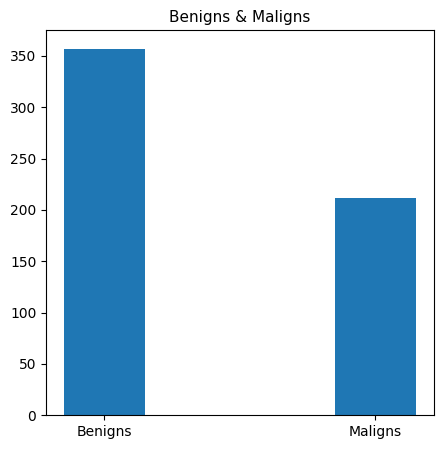

In [ ]:

plt.figure(1, figsize=(5, 5))
plt.bar(x=["Benigns", "Maligns"], height=[benignDiagnosis, malignDiagnosis], width=0.3)
plt.title("Benigns & Maligns", fontsize=11)
plt.show()

In [ ]:
#definindo faixa de valor
rangeBreastC = breastC.query("radius_mean >= 7 and radius_mean <= 29") ##def. range
radius = rangeBreastC.radius_mean
radius.head()

0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: radius_mean, dtype: float64

<AxesSubplot:xlabel='radius_mean'>

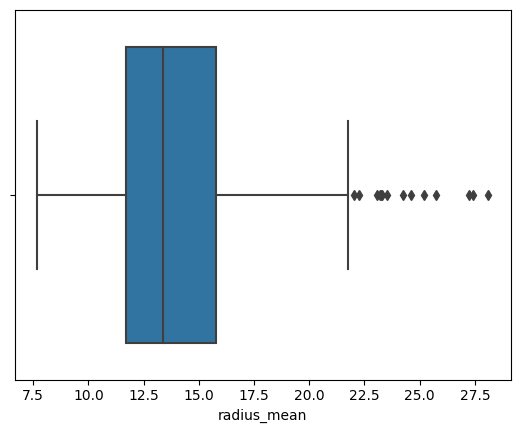

In [ ]:
sea.boxplot(x=radius)

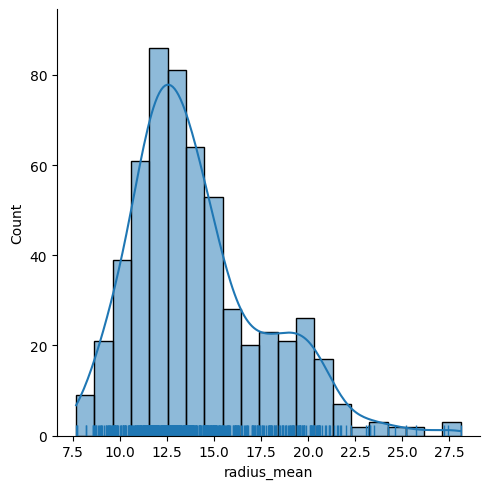

In [ ]:
sea.displot(x=radius, kde=True, rug=True)
